# **<center>IMDB | Predicting the Success of a Film Using Historical Data | Sharpest Minds<center>**

## **<center>Problem Statement: (Live Action Films Only)<center>**
1. **How can we predict the success of a film using historical data?**
<br>

        
## **<center>Goal(s):<center>**
    
**Define Success:**
- 1. Gross Reveue (Profits)
- 2. Rating
- 3. Award nomimations and wins

**What departments, jobs, or individuals have the most effect on determining the success of a film?**
    
**What are the most successful: ?**
- 1. Genres
- 2. Studios (Independent, Mainstream, etc.)
- 3. Production Companies
- 4. Locations
- 5. N/A



## **<center>Index:<center>**

**1. EDA**

**2. Findings & Summary**

## **<center>Field(s) of Interest:<center>**

### Target Variables:

1. **Revenue** - (Continuous Variable)
2. **Rating** - (Continuous Variable)

### Predictive Problem Type:
1. Regression
2. Classification (blockbuster or flop)
    
*note: Classification is the task of predicting a discrete class label. Regression is the task of predicting a continuous quantity.*

### Predictive Algorithms:

1. Linear Regression
2. Random Forests
3. XGBoost

*<center>Note: This project will not include Animated Feature Films</center>*

## What additional data can be collected to help in predicting the success of a film?

- 1. Social Media Data? (Hype)
- 2. Marketing Data? (Does the amount of marketing spend affect the outcome of a film?)
- 3. Ethnicity Data? (Does the ethnic make up of a cast help in the success of a film?)
- 4. Market Share? (Genre, Distributer,)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from ast import literal_eval
from typing import Dict, List
from collections import Counter
import ast
import re
import json
import nltk
import re
import csv
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings; warnings.simplefilter('ignore')

In [2]:
sns.set(rc={
    'figure.figsize': (12, 8),
    'font.size': 14
})

# Set palette
sns.set_palette("husl")

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [4]:
imdb_final = pd.read_csv('../data/processed/imdb_final.csv')

In [5]:
imdb_final.head()

,id,imdb_id,title,budget,revenue,release_date,belongs_to_collection,runtime,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Adventure,genre_Crime,genre_Science Fiction,genre_Family,genre_Horror,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Western,genre_Documentary,genre_Foreign,genre_TV Movie,lead,Algeria,Argentina,Australia,Austria,Bahamas,Belgium,Botswana,Brazil,Bulgaria,Burkina Faso,Cambodia,Canada,Chile,China,Colombia,Costa Rica,Croatia,Czech Republic,Denmark,Ecuador,Finland,France,Germany,Ghana,Greece,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Ireland,Israel,Italy,Japan,Jordan,Kazakhstan,Liechtenstein,Lithuania,Luxembourg,Malaysia,Malta,Mauritania,Mexico,Monaco,Mongolia,Morocco,Namibia,Netherlands,New Zealand,Norway,Pakistan,Palestinian Territory,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Romania,Russia,Saudi Arabia,Serbia,Serbia and Montenegro,Singapore,Slovenia,South Africa,South Korea,Spain,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Venezuela,Amblin Entertainment,BBC Films,Blumhouse Productions,Canal+,Castle Rock Entertainment,Columbia Pictures,Columbia Pictures Corporation,Davis Entertainment,Dimension Films,DreamWorks Animation,DreamWorks SKG,Dune Entertainment,Dune Entertainment III,Epsilon Motion Pictures,EuropaCorp,Film4,Focus Features,Fox 2000 Pictures,Fox Searchlight Pictures,France 2 Cinéma,Happy Madison Productions,Hollywood Pictures,Imagine Entertainment,Ingenious Film Partners,Lakeshore Entertainment,Legendary Pictures,Lions Gate Films,Lionsgate,Malpaso Productions,Metro-Goldwyn-Mayer (MGM),Millennium Films,Miramax Films,Morgan Creek Productions,New Line Cinema,New Regency Pictures,Original Film,Orion Pictures,Paramount Pictures,Participant Media,PolyGram Filmed Entertainment,Regency Enterprises,Relativity Media,Revolution Studios,Scott Free Productions,Scott Rudin Productions,Screen Gems,Silver Pictures,Spyglass Entertainment,Studio Babelsberg,StudioCanal,Summit Entertainment,TF1 Films Production,TSG Entertainment,The Weinstein Company,Touchstone Pictures,TriStar Pictures,Twentieth Century Fox Film Corporation,UK Film Council,United Artists,Universal Pictures,Village Roadshow Pictures,Walt Disney Pictures,Warner Bros.,Working Title Films,gross_profit
0,862,tt0114709,Toy Story,30000000,373554033,1995-10-30,1,81.0,3,Animation Comedy Family,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,Tom Hanks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343554033
1,8844,tt0113497,Jumanji,65000000,262797249,1995-12-15,0,104.0,3,Adventure Family Fantasy,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,Robin Williams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197797249
2,31357,tt0114885,Waiting to Exhale,16000000,81452156,1995-12-22,0,127.0,3,Comedy Drama Romance,1,1,0,0,1,0,

In [6]:
print(imdb_final.columns.tolist())

['id', 'imdb_id', 'title', 'budget', 'revenue', 'release_date', 'belongs_to_collection', 'runtime', 'num_genres', 'all_genres', 'genre_Drama', 'genre_Comedy', 'genre_Thriller', 'genre_Action', 'genre_Romance', 'genre_Adventure', 'genre_Crime', 'genre_Science Fiction', 'genre_Family', 'genre_Horror', 'genre_Fantasy', 'genre_Mystery', 'genre_Animation', 'genre_History', 'genre_Music', 'genre_War', 'genre_Western', 'genre_Documentary', 'genre_Foreign', 'genre_TV Movie', 'lead', 'Algeria', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Belgium', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mauritania', 'Mexico', 'Monaco', 'Mong

In [7]:
imdb_final_list = ['id', 'imdb_id', 'title', 'budget', 'revenue', 'release_date', 'belongs_to_collection', 'runtime', 'num_genres', 'all_genres', 
 'genre_Drama', 'genre_Comedy', 'genre_Thriller', 'genre_Action', 'genre_Romance', 'genre_Adventure', 'genre_Crime', 'genre_Science Fiction', 
 'genre_Family', 'genre_Horror', 'genre_Fantasy', 'genre_Mystery', 'genre_Animation', 'genre_History', 'genre_Music', 'genre_War', 'genre_Western', 
 'genre_Documentary', 'genre_Foreign', 'genre_TV Movie', 'lead', 'Algeria', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Belgium', 'Botswana', 'Brazil', 
 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 
 'France', 'Germany', 'Ghana', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 
 'Kazakhstan', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mauritania', 'Mexico', 'Monaco', 'Mongolia', 'Morocco', 'Namibia', 'Netherlands', 
 'New Zealand', 'Norway', 'Pakistan', 'Palestinian Territory', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia', 
 'Saudi Arabia', 'Serbia', 'Serbia and Montenegro', 'Singapore', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 
 'Thailand', 'Tunisia', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States of America', 'Uruguay', 'Venezuela', 'Amblin Entertainment', 
 'BBC Films', 'Blumhouse Productions', 'Canal+', 'Castle Rock Entertainment', 'Columbia Pictures', 'Columbia Pictures Corporation', 'Davis Entertainment', 'Dimension Films', 
 'DreamWorks Animation', 'DreamWorks SKG', 'Dune Entertainment', 'Dune Entertainment III', 'Epsilon Motion Pictures', 'EuropaCorp', 'Film4', 'Focus Features',
 'Fox 2000 Pictures', 'Fox Searchlight Pictures', 'France 2 Cinéma', 'Happy Madison Productions', 'Hollywood Pictures', 'Imagine Entertainment', 'Ingenious Film Partners', 
 'Lakeshore Entertainment', 'Legendary Pictures', 'Lions Gate Films', 'Lionsgate', 'Malpaso Productions', 'Metro-Goldwyn-Mayer (MGM)', 'Millennium Films', 'Miramax Films', 
 'Morgan Creek Productions', 'New Line Cinema', 'New Regency Pictures', 'Original Film', 'Orion Pictures', 'Paramount Pictures', 'Participant Media',
 'PolyGram Filmed Entertainment', 'Regency Enterprises', 'Relativity Media', 'Revolution Studios', 'Scott Free Productions', 'Scott Rudin Productions', 
 'Screen Gems', 'Silver Pictures', 'Spyglass Entertainment', 'Studio Babelsberg', 'StudioCanal', 'Summit Entertainment', 'TF1 Films Production', 'TSG Entertainment',
 'The Weinstein Company', 'Touchstone Pictures', 'TriStar Pictures', 'Twentieth Century Fox Film Corporation', 'UK Film Council', 'United Artists', 'Universal Pictures', 
 'Village Roadshow Pictures', 'Walt Disney Pictures', 'Warner Bros.', 'Working Title Films', 'gross_profit']

imdb_final = pd.read_csv('../data/processed/imdb_final.csv', usecols=imdb_final_list)

In [8]:
genre_list = ['id', 'imdb_id', 'title', 'budget', 'revenue', 'release_date', 'belongs_to_collection',
              'runtime', 'num_genres', 'all_genres', 'genre_Drama', 'genre_Comedy', 'genre_Thriller',
              'genre_Action', 'genre_Romance', 'genre_Adventure', 'genre_Crime', 'genre_Science Fiction',
              'genre_Family', 'genre_Horror', 'genre_Fantasy', 'genre_Mystery', 'genre_Animation', 'genre_History',
              'genre_Music', 'genre_War', 'genre_Western', 'genre_Documentary', 'genre_Foreign', 'genre_TV Movie', 'lead','gross_profit']

imdb_genres = pd.read_csv('../data/processed/imdb_final.csv', usecols=genre_list)

In [9]:
countries_list = ['id', 'imdb_id', 'title', 'budget', 'revenue', 'release_date', 'belongs_to_collection',
              'runtime', 'num_genres', 'all_genres', 'lead','Algeria', 'Argentina', 'Australia', 'Austria',
              'Bahamas', 'Belgium', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Canada',
              'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Ecuador',
              'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India',
              'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Liechtenstein',
              'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mauritania', 'Mexico', 'Monaco', 'Mongolia', 'Morocco',
              'Namibia', 'Netherlands', 'New Zealand', 'Norway', 'Pakistan', 'Palestinian Territory', 'Paraguay', 'Peru',
              'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia',
              'Serbia and Montenegro', 'Singapore', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden',
              'Switzerland', 'Taiwan', 'Thailand', 'Tunisia', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
              'United States of America', 'Uruguay', 'Venezuela', 'gross_profit']

imdb_countries = pd.read_csv('../data/processed/imdb_final.csv', usecols=countries_list)

In [10]:
companies_list = ['id', 'imdb_id', 'title', 'budget', 'revenue', 'release_date', 'belongs_to_collection',
              'runtime', 'num_genres', 'all_genres', 'lead', 'Amblin Entertainment', 'BBC Films', 'Blumhouse Productions',
                  'Canal+', 'Castle Rock Entertainment', 'Columbia Pictures', 'Columbia Pictures Corporation', 'Davis Entertainment',
                  'Dimension Films', 'DreamWorks Animation', 'DreamWorks SKG', 'Dune Entertainment', 'Dune Entertainment III',
                  'Epsilon Motion Pictures', 'EuropaCorp', 'Film4', 'Focus Features', 'Fox 2000 Pictures', 'Fox Searchlight Pictures',
                  'France 2 Cinéma', 'Happy Madison Productions', 'Hollywood Pictures', 'Imagine Entertainment', 'Ingenious Film Partners',
                  'Lakeshore Entertainment', 'Legendary Pictures', 'Lions Gate Films', 'Lionsgate', 'Malpaso Productions',
                  'Metro-Goldwyn-Mayer (MGM)', 'Millennium Films', 'Miramax Films', 'Morgan Creek Productions', 'New Line Cinema',
                  'New Regency Pictures', 'Original Film', 'Orion Pictures', 'Paramount Pictures', 'Participant Media', 
                  'PolyGram Filmed Entertainment', 'Regency Enterprises', 'Relativity Media', 'Revolution Studios',
                  'Scott Free Productions', 'Scott Rudin Productions', 'Screen Gems', 'Silver Pictures', 'Spyglass Entertainment',
                  'Studio Babelsberg', 'StudioCanal', 'Summit Entertainment', 'TF1 Films Production', 'TSG Entertainment',
                  'The Weinstein Company', 'Touchstone Pictures', 'TriStar Pictures', 'Twentieth Century Fox Film Corporation',
                  'UK Film Council', 'United Artists', 'Universal Pictures', 'Village Roadshow Pictures', 'Walt Disney Pictures',
                  'Warner Bros.', 'Working Title Films', 'gross_profit']

imdb_companies = pd.read_csv('../data/processed/imdb_final.csv', usecols=companies_list)

# Distributions

In [11]:
numeric_columns = ["budget", 
                   "revenue", 
                   "runtime", 
                   "num_genres", 
                   "gross_profit"]
numeric_columns

['budget', 'revenue', 'runtime', 'num_genres', 'gross_profit']

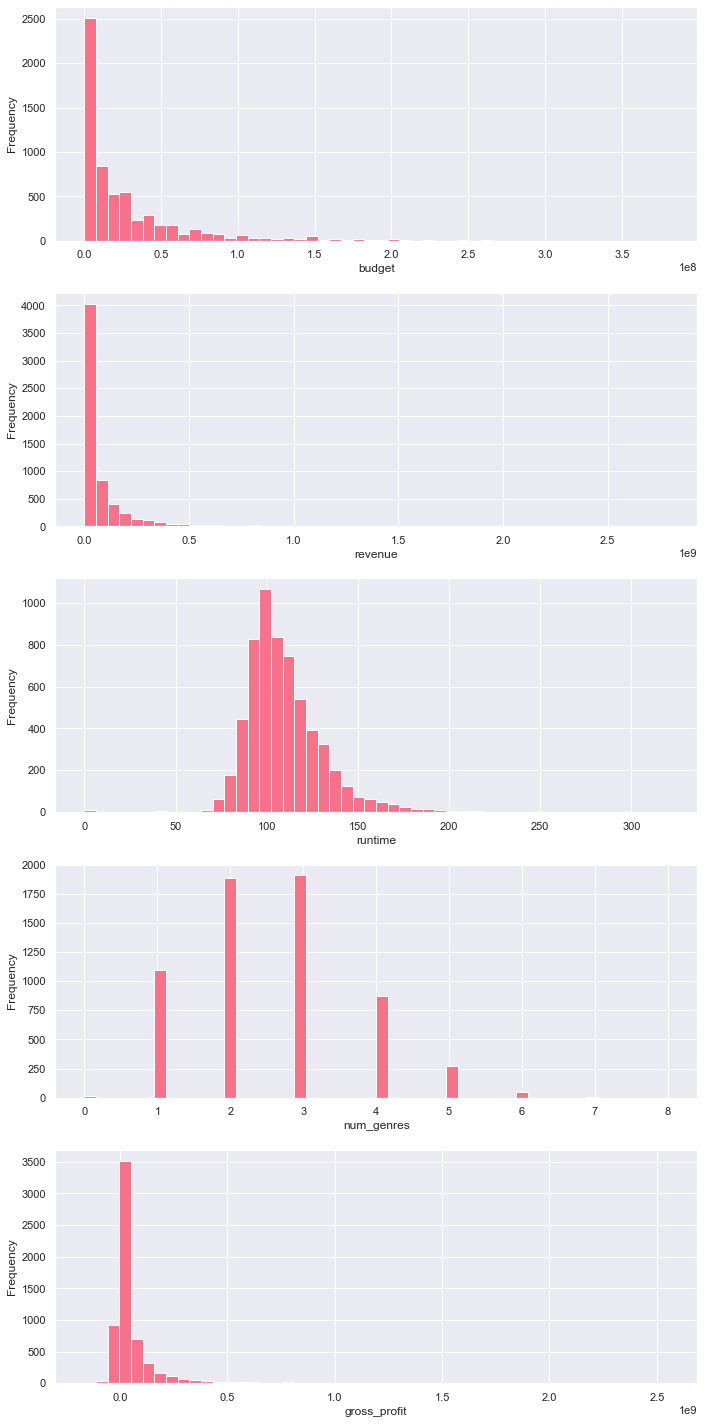

In [12]:
# set up subplots
plt.subplots(5, 1, figsize=(10, 20))

#iterate through columns
for idx, col_name in enumerate(numeric_columns, 1):
    plt.subplot(5, 1, idx)
    
    # plot histogram
    imdb_final[col_name].plot(kind="hist", bins=50)

    # label
    plt.xlabel(col_name)

plt.tight_layout()
#plt.suptitle("Numeric column distributions")
plt.show()

In [13]:
imdb_final[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
budget,6096.0,2.710168e+07,3.922620e+07,0.0,1300000.0,13000000.0,35000000.00,3.800000e+08
revenue,6096.0,8.375991e+07,1.575183e+08,1000000.0,8265465.5,27637666.5,88006445.25,2.787965e+09
runtime,6095.0,1.093180e+02,2.137686e+01,0.0,95.0,106.0,120.00,3.200000e+02
num_genres,6096.0,2.584974e+00,1.127040e+00,0.0,2.0,3.0,3.00,8.000000e+00
gross_profit,6096.0,5.665823e+07,1.315970e+08,-165710090.0,1575934.5,13587306.5,56850004.50,2.550965e+09


## Correlations

Now I’ll check for correlation between the predictors.

In [14]:
X = imdb_genres

y = 'gross_profit'

<AxesSubplot:>

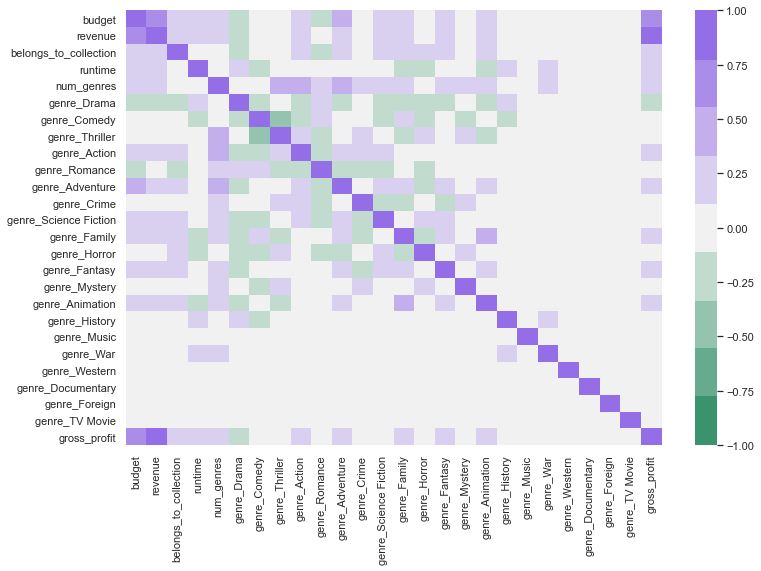

In [15]:
sns.heatmap(imdb_genres.drop(['title', 'id'], axis=1).corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9))

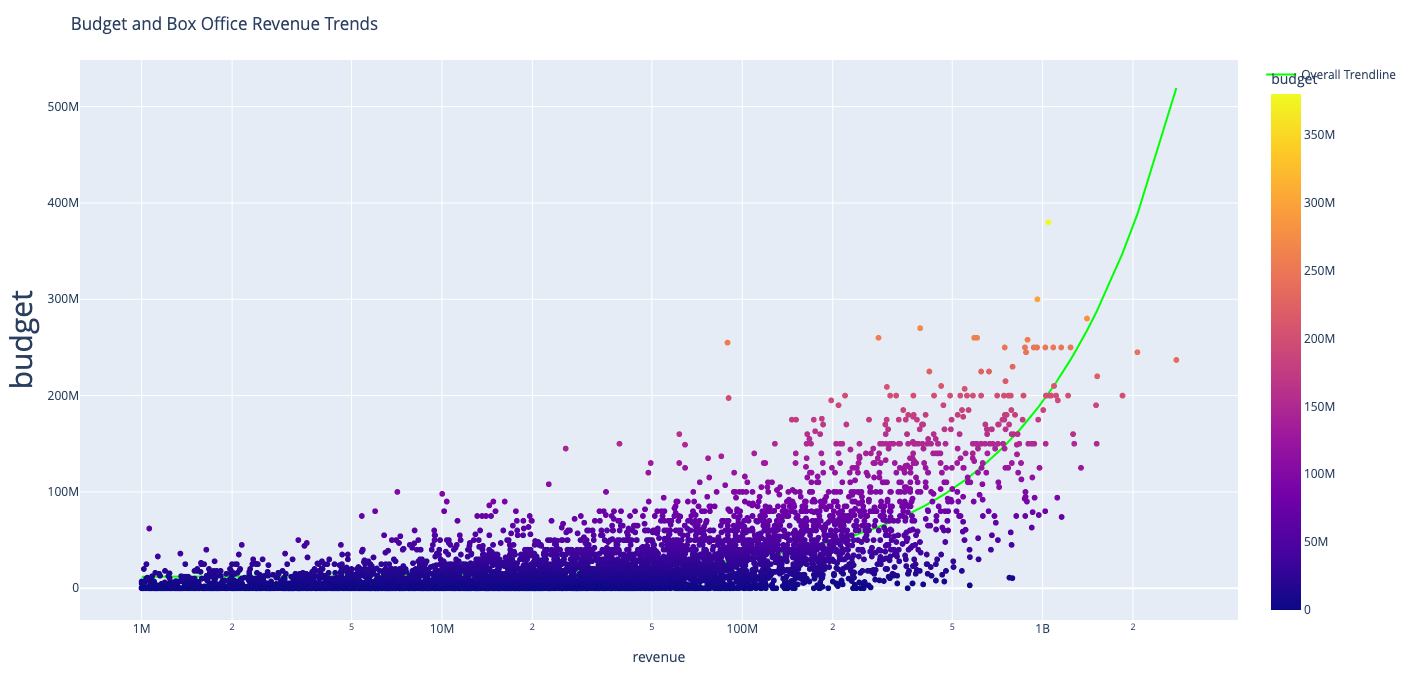

In [16]:
import plotly.express as px

df = imdb_genres
fig = px.scatter(df, x="revenue", y="budget", trendline="ols", trendline_scope="overall", 
                 hover_name="title", log_x="True", trendline_color_override="lime",
                color="budget")

fig.update_layout(
    title = "Budget and Box Office Revenue Trends",
    autosize=False,
    width=1000,
    height=700,
    yaxis=dict(
        titlefont=dict(size=30),
    )
)
fig.show()

Within my features, there are three stronger correlations :

- `revenue` and `budget`
- `family` and `animation`

***Revenue and Budget***

Text(0, 0.5, 'Budget')

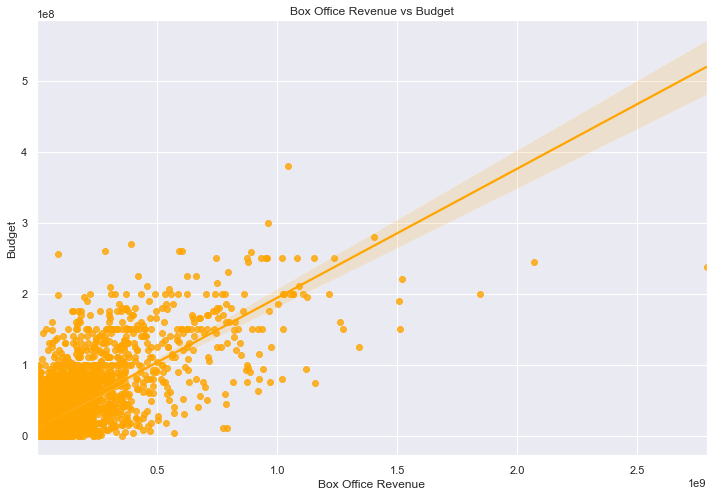

In [17]:
sns.regplot(x='revenue', y='budget', data=imdb_genres, color = 'orange')
plt.title('Box Office Revenue vs Budget')
plt.xlabel('Box Office Revenue')
plt.ylabel('Budget')

Since the points are very clustered together, I will visualise this a double-log scale to see if I can get a better view of the relationship.

[None, None]

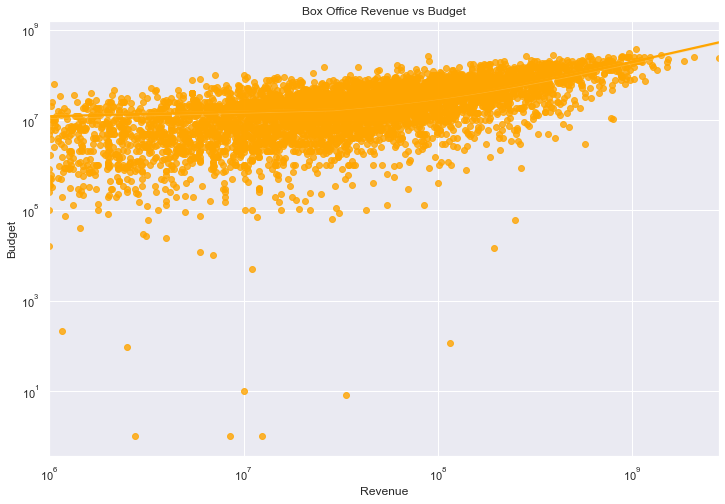

In [18]:
rev_vs_bug = sns.regplot(x='revenue', y='budget', data=imdb_genres, color = 'orange' )
plt.title('Box Office Revenue vs Budget')
plt.xlabel('Revenue')
plt.ylabel('Budget')
rev_vs_bug.set(xscale="log", yscale="log")

***Family and Animation***

In [19]:
# Both
both = len(imdb_genres[(imdb_genres['genre_Family'] == 1) & (imdb_genres['genre_Animation'] == 1)])

# Animation
ani = len(imdb_genres[imdb_genres['genre_Animation'] == 1])

# Family
fam = len(imdb_genres[imdb_genres['genre_Family'] == 1])

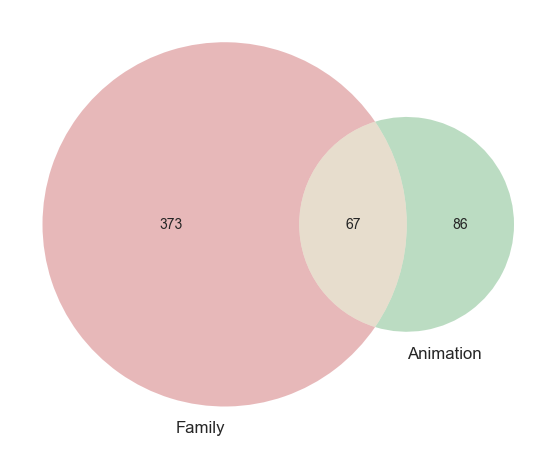

In [20]:
from matplotlib_venn import venn2
venn2(subsets = (fam-both, ani-both, 67), 
      set_labels = ('Family', 'Animation'))
plt.show()

## Production Companies

In [21]:
imdb_companies.head()

,id,imdb_id,title,budget,revenue,release_date,belongs_to_collection,runtime,num_genres,all_genres,lead,Amblin Entertainment,BBC Films,Blumhouse Productions,Canal+,Castle Rock Entertainment,Columbia Pictures,Columbia Pictures Corporation,Davis Entertainment,Dimension Films,DreamWorks Animation,DreamWorks SKG,Dune Entertainment,Dune Entertainment III,Epsilon Motion Pictures,EuropaCorp,Film4,Focus Features,Fox 2000 Pictures,Fox Searchlight Pictures,France 2 Cinéma,Happy Madison Productions,Hollywood Pictures,Imagine Entertainment,Ingenious Film Partners,Lakeshore Entertainment,Legendary Pictures,Lions Gate Films,Lionsgate,Malpaso Productions,Metro-Goldwyn-Mayer (MGM),Millennium Films,Miramax Films,Morgan Creek Productions,New Line Cinema,New Regency Pictures,Original Film,Orion Pictures,Paramount Pictures,Participant Media,PolyGram Filmed Entertainment,Regency Enterprises,Relativity Media,Revolution Studios,Scott Free Productions,Scott Rudin Productions,Screen Gems,Silver Pictures,Spyglass Entertainment,Studio Babelsberg,StudioCanal,Summit Entertainment,TF1 Films Production,TSG Entertainment,The Weinstein Company,Touchstone Pictures,TriStar Pictures,Twentieth Century Fox Film Corporation,UK Film Council,United Artists,Universal Pictures,Village Roadshow Pictures,Walt Disney Pictures,Warner Bros.,Working Title Films,gross_profit
0,862,tt0114709,Toy Story,30000000,373554033,1995-10-30,1,81.0,3,Animation Comedy Family,Tom Hanks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343554033
1,8844,tt0113497,Jumanji,65000000,262797249,1995-12-15,0,104.0,3,Adventure Family Fantasy,Robin Williams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197797249
2,31357,tt0114885,Waiting to Exhale,16000000,81452156,1995-12-22,0,127.0,3,Comedy Drama Romance,Whitney Houston,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65452156
3,11862,tt0113041,Father of the Bride Part II,0,76578911,1995-02-10,1,106.0,1,Comedy,Steve Martin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76578911
4,949,tt0113277,Heat,60000000,187436818,1995-12-15,0,170.0,4,Action Crime Drama Thriller,Al Pacino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,127436818


<AxesSubplot:>

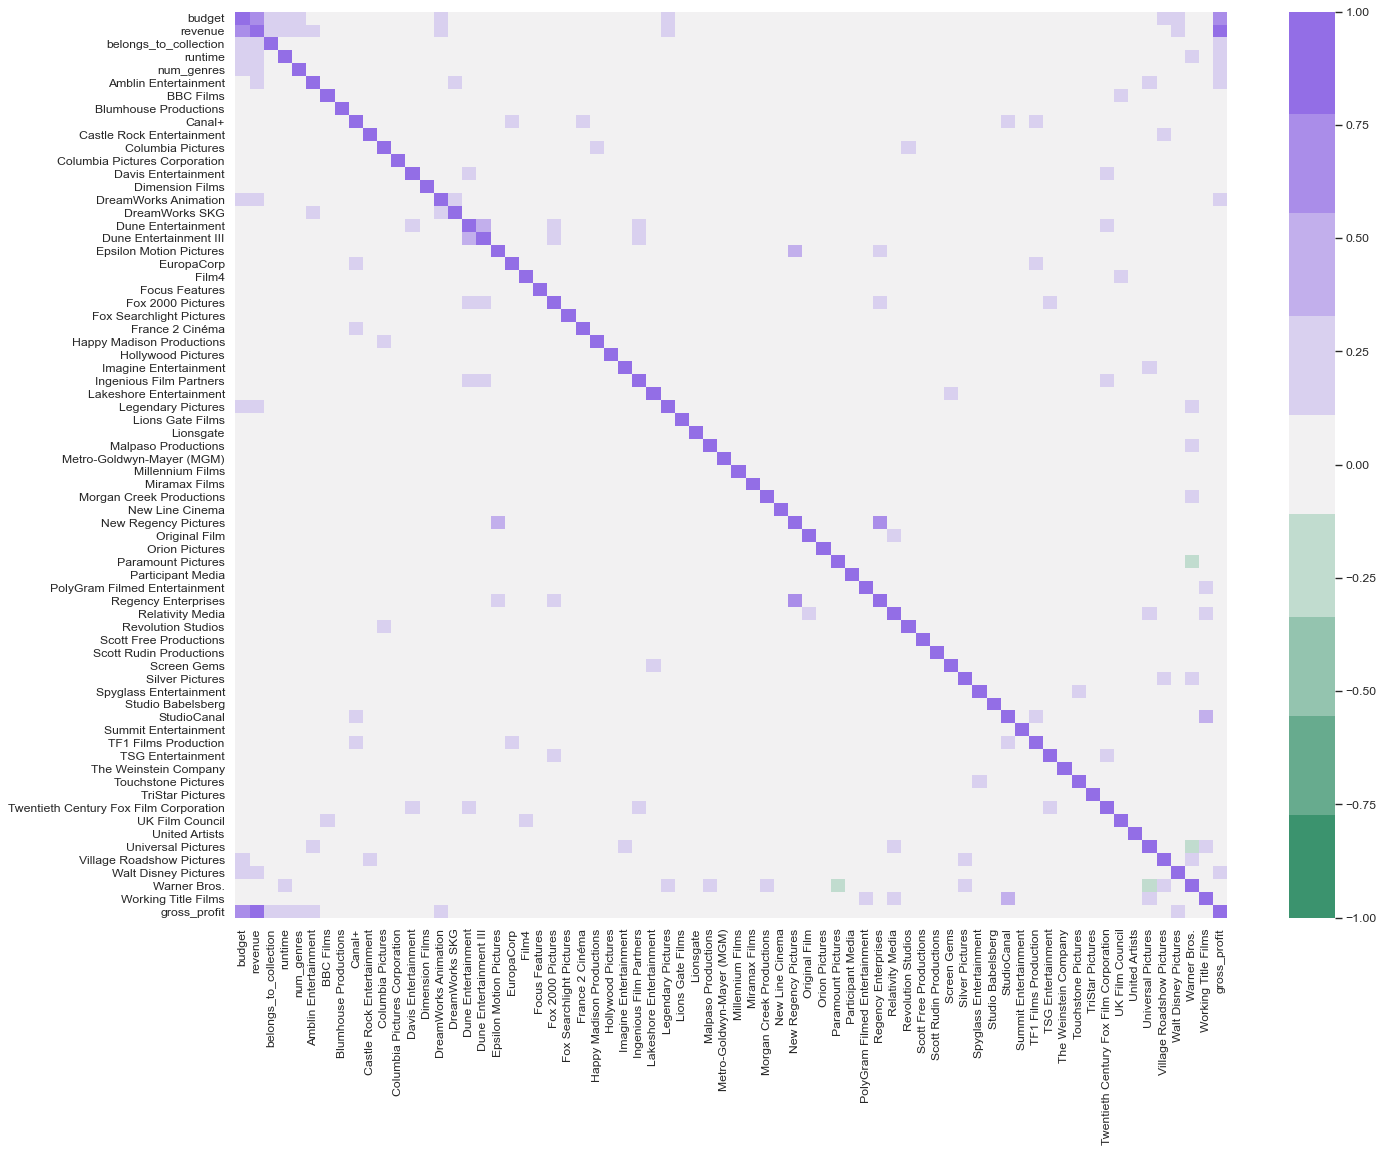

In [22]:
from matplotlib.pyplot import figure
figure(figsize=(20, 15), dpi=80)
sns.heatmap(imdb_companies.drop(['title', 'id'], axis=1).corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9))

## Highest Revenue Films

In [23]:
high_rev = imdb_final[['title', 'revenue']].sort_values(by = 'revenue', ascending = False)
high_rev['revenue'] = high_rev['revenue'].map('${:,.2f}'.format)

In [24]:
high_rev.head(10)

,title,revenue
4059,Avatar,"$2,787,965,087.00"
5258,Star Wars: The Force Awakens,"$2,068,223,624.00"
685,Titanic,"$1,845,034,188.00"
4438,The Avengers,"$1,519,557,910.00"
5193,Jurassic World,"$1,513,528,810.00"
5346,Furious 7,"$1,506,249,360.00"
5261,Avengers: Age of Ultron,"$1,405,403,694.00"
4394,Harry Potter and the Deathly Hallows: Part 2,"$1,342,000,000.00"
4938,Frozen,"$1,274,219,009.00"
5960,Beauty and the Beast,"$1,262,886,337.00"


In [25]:
high_rev.dtypes

title      object
revenue    object
dtype: object

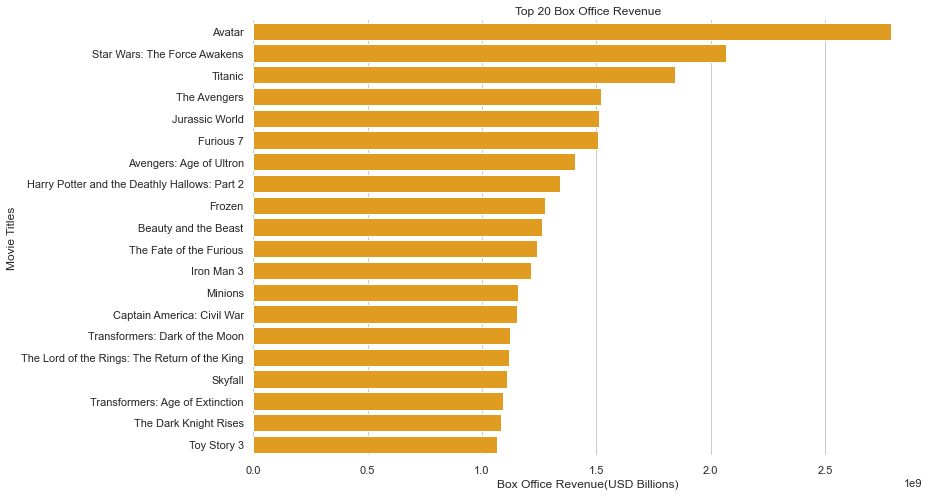

In [26]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Load revenue data
high_rev = imdb_final[['title', 'revenue']].sort_values(by = 'revenue', ascending = False).head(20)

# plot the highest revenue films
ax =sns.barplot(x='revenue', y='title', data=high_rev,
            label="Total", color="orange", ax=ax)

# Add x and y axis labels
ax.set(ylabel="Movie Titles",
       xlabel="Box Office Revenue(USD Billions)",
       title='Top 20 Box Office Revenue')

sns.despine(left=True, bottom=True)

## Highest Box Office Gross Profit Films

In [27]:
high_gp = imdb_final[['title', "gross_profit"]].sort_values(by = "gross_profit", ascending = False)
high_gp["gross_profit"] = high_gp["gross_profit"].map('${:,.2f}'.format)
high_gp.head(20)

,title,gross_profit
4059,Avatar,"$2,550,965,087.00"
5258,Star Wars: The Force Awakens,"$1,823,223,624.00"
685,Titanic,"$1,645,034,188.00"
5193,Jurassic World,"$1,363,528,810.00"
5346,Furious 7,"$1,316,249,360.00"
4438,The Avengers,"$1,299,557,910.00"
4394,Harry Potter and the Deathly Hallows: Part 2,"$1,217,000,000.00"
5261,Avengers: Age of Ultron,"$1,125,403,694.00"
4938,Frozen,"$1,124,219,009.00"
5960,Beauty and the Beast,"$1,102,886,337.00"


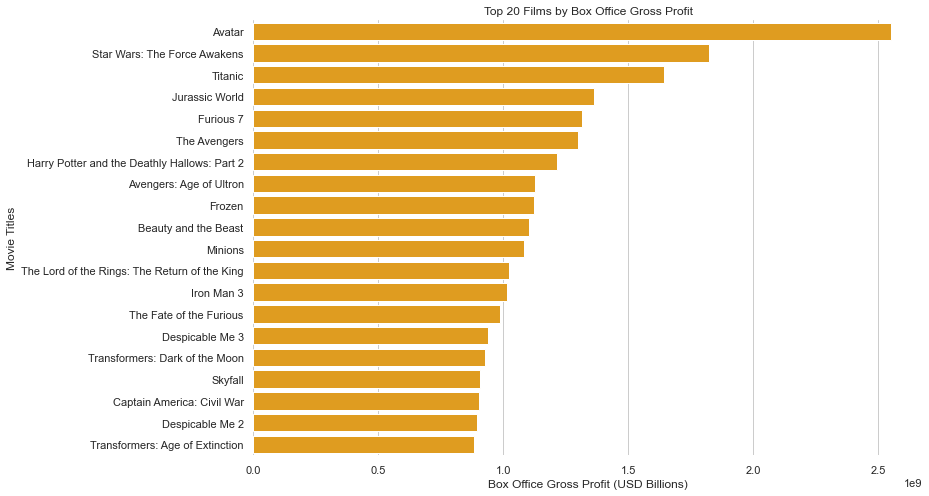

In [28]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Load gross profit data
high_gp = imdb_final[['title', 'gross_profit']].sort_values(by = 'gross_profit', ascending = False).head(20)

# plot the highest revenue films
sns.barplot(x='gross_profit', y='title', data=high_gp,
            label="Total", color="orange")

# Add x and y axis labels
ax.set(ylabel="Movie Titles",
       xlabel="Box Office Gross Profit (USD Billions)",
       title='Top 20 Films by Box Office Gross Profit')
sns.despine(left=True, bottom=True)

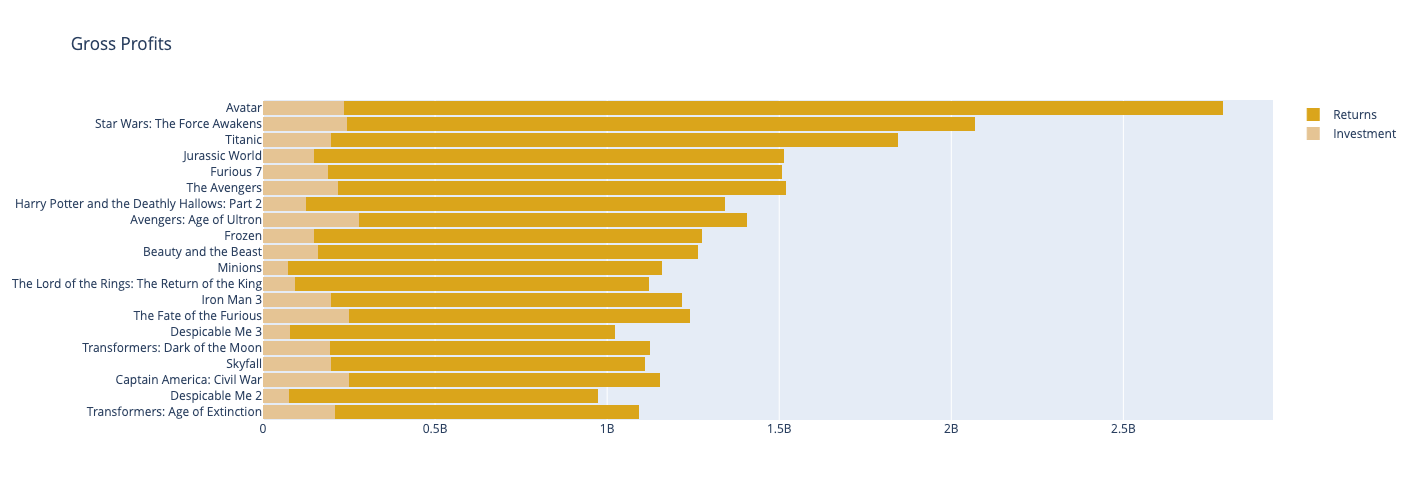

In [29]:
import plotly.express as px
import plotly.graph_objects as go

# Load gross profit data
profit = imdb_final[['title', 'budget', 'gross_profit']].sort_values(by = 'gross_profit', ascending = False).head(20)
title = profit['title']
investment = profit['budget']
returns = profit['gross_profit']

fig = go.Figure()

fig.add_trace(go.Bar(
    y = title,
    x = investment,
    name = 'Investment',
    orientation='h',
    marker=dict(
        color='rgb(229, 196, 148)',
        line=dict(color='rgb(229, 196, 148)', width=1)
    )
)) 
fig.add_trace(go.Bar(
    y = title,
    x = returns,
    name = 'Returns',
    orientation='h',
    marker=dict(
        color='rgb(218, 165, 27)',
        line=dict(color='rgb(218, 165, 27)', width=1)
    )
))

fig.update_layout(
    title = "Gross Profits",
    autosize=False,
    width=1300,
    height=500,
    yaxis=dict(
        titlefont=dict(size=30),
    )
)

# Change the bar mode
fig.update_layout(barmode='stack')
fig.update_yaxes(
    type="category",
    categoryorder="max ascending")
fig.update_yaxes(automargin=True)
fig.show()

## Biggest Flops

In [30]:
low_gp = imdb_final[['title', "gross_profit", "revenue", "budget"]].sort_values(by = "gross_profit", ascending = True)
low_gp["gross_profit"] = low_gp["gross_profit"].map('${:,.2f}'.format)
low_gp.head(20)

,title,gross_profit,revenue,budget
4840,The Lone Ranger,"$-165,710,090.00",89289910,255000000
2698,The Alamo,"$-119,180,039.00",25819961,145000000
4316,Mars Needs Moms,"$-111,007,242.00",38992758,150000000
6059,Valerian and the City of a Thousand Planets,"$-107,447,384.00",90024292,197471676
1196,The 13th Warrior,"$-98,301,101.00",61698899,160000000
2180,The Adventures of Pluto Nash,"$-92,896,027.00",7103973,100000000
10,Cutthroat Island,"$-87,982,678.00",10017322,98000000
5910,Live by Night,"$-85,321,445.00",22678555,108000000
3414,Flushed Away,"$-84,540,684.00",64459316,149000000
3829,Australia,"$-80,445,998.00",49554002,130000000


In [31]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
low_gp.loc[imdb_final['title'] == 'The Alamo']

,title,gross_profit,revenue,budget
2698,The Alamo,"$-119,180,039.00",25819961,145000000
1665,The Alamo,"$-4,100,000.00",7900000,12000000


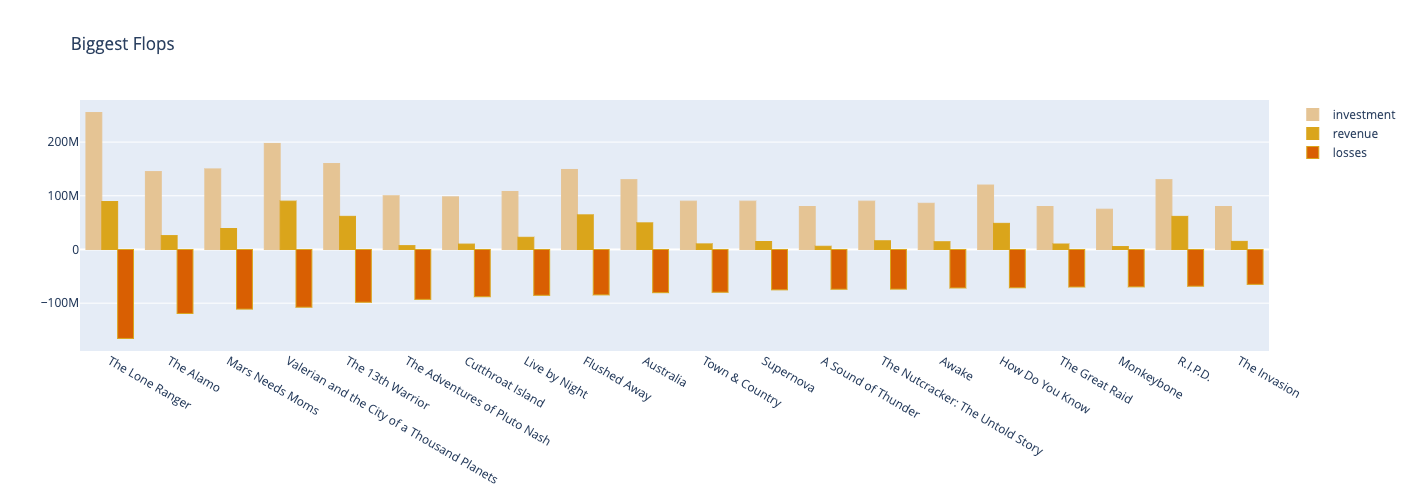

In [32]:
import plotly.graph_objects as go

# Load gross profit data
profit = imdb_final[['title', 'budget', 'revenue', 'gross_profit']].sort_values(by = 'gross_profit', ascending = True).head(20)
title = profit['title']
investment = profit['budget']
revenue = profit['revenue']
profit = profit['gross_profit']

fig = go.Figure()

fig.add_trace(go.Bar(x=title, y=investment,
                base=[-500,-600,-700],
                name='investment',
                marker=dict(
                color='rgb(229, 196, 148)',
                line=dict(color='rgb(229, 196, 148)', width=1)
    )
)) 
fig.add_trace(go.Bar(x=title, y=revenue,
                base=0,
                name='revenue',
                marker=dict(
                color='rgb(218, 165, 27)',
                line=dict(color='rgb(218, 165, 27)', width=1)
    )
))
fig.add_trace(go.Bar(x=title, y=profit,
                base=0,
                name='losses',
                marker=dict(
                color='rgb(217, 95, 2)',
                line=dict(color='rgb(218, 165, 27)', width=1)
    )
))
fig.update_layout(
    title = "Biggest Flops",
    autosize=False,
    width=1300,
    height=500,
    yaxis=dict(
        titlefont=dict(size=30),
    )
)
fig.show()

## Runtime

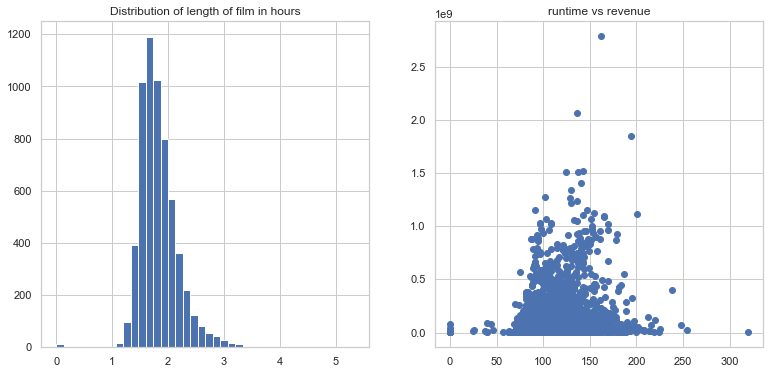

In [33]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(imdb_final['runtime'].fillna(0) / 60, bins=40);
plt.title('Distribution of length of film in hours');
plt.subplot(1, 3, 2)
plt.scatter(imdb_final['runtime'].fillna(0), imdb_final['revenue'])
plt.title('runtime vs revenue');

Text(0, 0.5, 'Runtime')

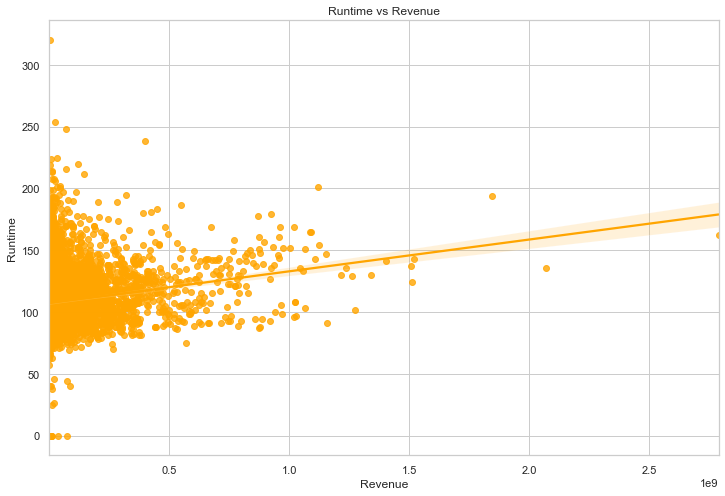

In [34]:
sns.regplot(x='revenue', y='runtime', data=imdb_genres, color = 'orange')
plt.title('Runtime vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('Runtime')

[None, None]

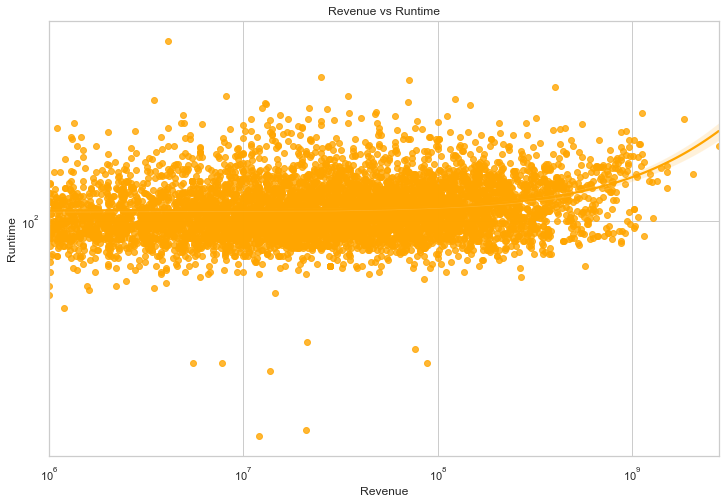

In [35]:
rev_vs_run = sns.regplot(x='revenue', y='runtime', data=imdb_genres, color = 'orange' )
plt.title('Revenue vs Runtime')
plt.xlabel('Revenue')
plt.ylabel('Runtime')
rev_vs_run.set(xscale="log", yscale="log")

## Belongs to a collection

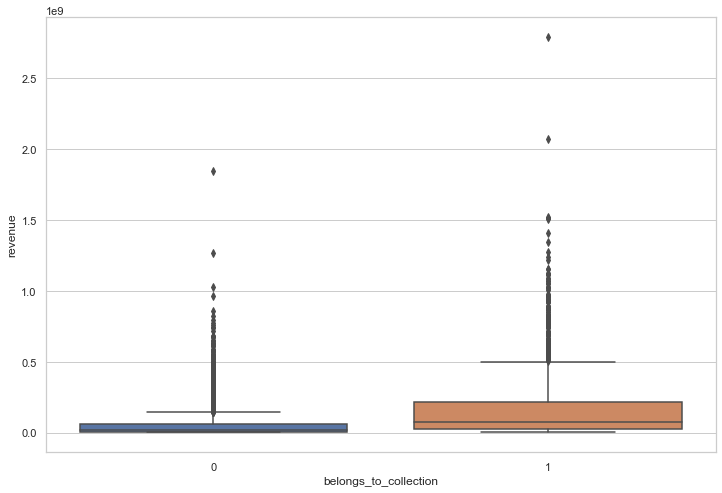

In [36]:
sns.boxplot(x='belongs_to_collection', y='revenue', data=imdb_final);

Films, which are part of a collection usually have higher revenues. I suppose such films have a bigger fan base thanks to previous films.

## Release Date

In [37]:
imdb_final['release_date'] = pd.to_datetime(imdb_final['release_date'],  errors='coerce')

In [38]:
def fix_date(x):
    """
    Fixes dates which are in 20xx
    """
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + yea

In [39]:
# creating features based on dates
def process_date(df):
    date_parts = ["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
    for part in date_parts:
        part_col = 'release_date' + "_" + part
        df[part_col] = getattr(df['release_date'].dt, part).astype(int)
    
    return df

imdb_final_release = process_date(imdb_final)

In [40]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

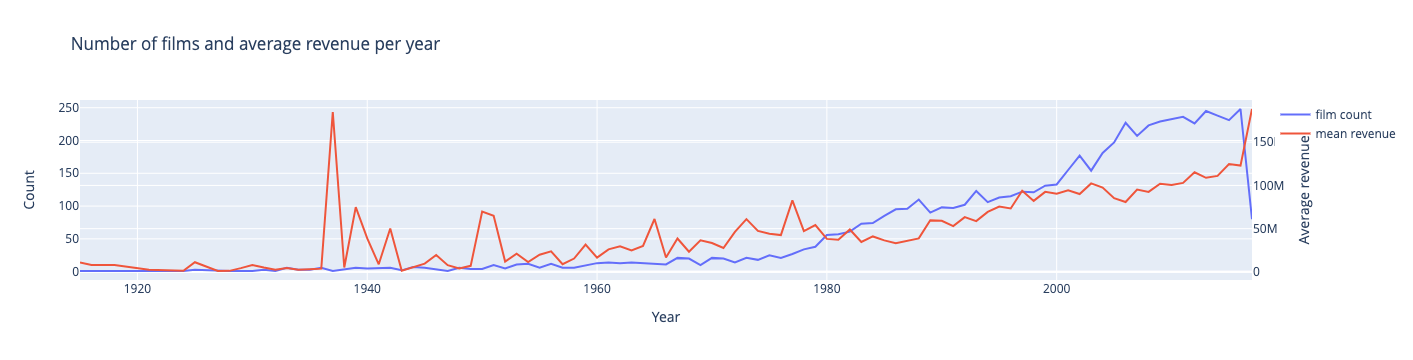

In [41]:
d1 = imdb_final_release['release_date_year'].value_counts().sort_index()
d2 = imdb_final_release.groupby(['release_date_year'])['revenue'].mean()
data = [go.Scatter(x=d1.index, y=d1.values, name='film count'), go.Scatter(x=d2.index, y=d2.values, name='mean revenue', yaxis='y2')]
layout = go.Layout(dict(title = "Number of films and average revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Average revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

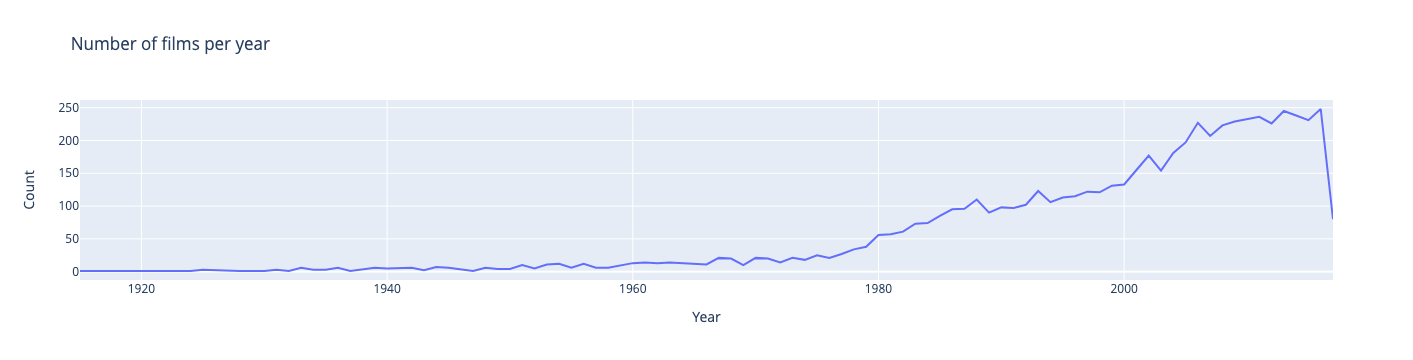

In [42]:
d1 = imdb_final['release_date_year'].value_counts().sort_index()
data = [go.Scatter(x=d1.index, y=d1.values, name='imdb_final')]
layout = go.Layout(dict(title = "Number of films per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

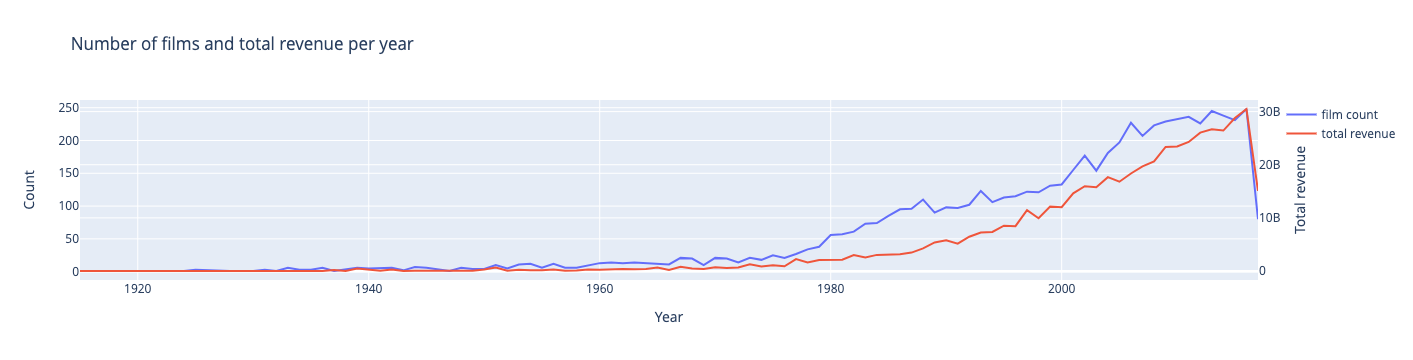

In [43]:
d1 = imdb_final['release_date_year'].value_counts().sort_index()
d2 = imdb_final.groupby(['release_date_year'])['revenue'].sum()
data = [go.Scatter(x=d1.index, y=d1.values, name='film count'), go.Scatter(x=d2.index, y=d2.values, name='total revenue', yaxis='y2')]
layout = go.Layout(dict(title = "Number of films and total revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Total revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

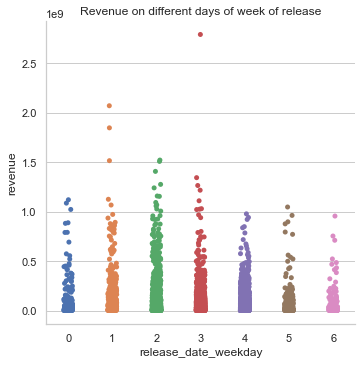

In [44]:
sns.catplot(x='release_date_weekday', y='revenue', data=imdb_final);
plt.title('Revenue on different days of week of release');